In [2]:
import requests as req
from bs4 import BeautifulSoup as bs

In [3]:
res = req.get("https://finance.naver.com/")
soup = bs(res.content, 'lxml')

In [4]:
soup

<html lang="ko">
<head>
<title>네이버 증권</title>
<meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
<meta content="text/javascript" http-equiv="Content-Script-Type"/>
<meta content="text/css" http-equiv="Content-Style-Type"/>
<meta content="네이버 증권" name="apple-mobile-web-app-title"/>
<meta content="네이버 증권" property="og:title"/>
<meta content="https://ssl.pstatic.net/static/m/stock/im/2016/08/og_stock-200.png" property="og:image"/>
<meta content="https://finance.naver.com" property="og:url"/>
<meta content="국내 해외 증시 지수, 시장지표, 뉴스, 증권사 리서치 등 제공" property="og:description"/>
<meta content="article" property="og:type"/>
<meta content="" property="og:article:thumbnailUrl"/>
<meta content="네이버 증권" property="og:article:author"/>
<meta content="http://FINANCE.NAVER.COM" property="og:article:author:url"/>
<link href="https://ssl.pstatic.net/imgstock/static.pc/20230419003842/css/finance_header.css" rel="stylesheet" type="text/css"/>
<link href="https://ssl.pstatic.net/imgstock/stati

In [5]:
data = soup.select_one("div.aside_area.aside_stock > table > tbody > tr:nth-child(1) > th > a")
data

<a href="/world/sise.naver?symbol=DJI@DJI&amp;fdtc=0" onclick="clickcr(this, 'wst.dow', '', '', event);">다우산업(04.25)</a>

In [63]:
data.string

'다우산업(03.21)'

#### 네이버 검색에 쿠키런 킹덤 목록 가져오기

In [69]:
keyword = "쿠키런 킹덤"
url = "https://search.naver.com/search.naver?where=nexearch&sm=top_hty&fbm=1&ie=utf8&query="+keyword
res = req.get(url)
soup = bs(res.content, 'html.parser')

In [70]:
soup

<!DOCTYPE html>
 <html lang="ko"> <head> <meta charset="utf-8"/> <meta content="always" name="referrer"/> <meta content="telephone=no,address=no,email=no" name="format-detection"/> <meta content="width=device-width,initial-scale=1.0,maximum-scale=2.0" name="viewport"/> <meta content="쿠키런 킹덤 : 네이버 통합검색" property="og:title"> <meta content="https://ssl.pstatic.net/sstatic/search/common/og_v3.png" property="og:image"/> <meta content="'쿠키런 킹덤'의 네이버 통합검색 결과입니다." property="og:description"/> <meta content="'쿠키런 킹덤'의 네이버 통합검색 결과입니다." lang="ko" name="description"/> <title>쿠키런 킹덤 : 네이버 통합검색</title> <link href="https://ssl.pstatic.net/sstatic/search/favicon/favicon_191118_pc.ico" rel="shortcut icon"/> <link href="https://ssl.pstatic.net/sstatic/search/opensearch-description.https.xml" rel="search" title="Naver" type="application/opensearchdescription+xml"><link href="https://ssl.pstatic.net/sstatic/search/pc/css/search1_230216.css" rel="stylesheet" type="text/css"/> <link href="https://ssl.pstatic

In [73]:
title = soup.select_one("span > strong._text" )
title.string

'쿠키런: 킹덤'

In [80]:
#select() : 여러개 선택자 요소를 가져올때
#div.title_box > strong > a
cookie_names=soup.select("div.title_box > strong > a")
# cookie_names

[<a href="?where=nexearch&amp;sm=tab_etc&amp;mra=bkJB&amp;pkid=3001&amp;os=18076140&amp;x_nqx=%7B%22theme%22%3A%22game%22%2C%22pkid%22%3A%223001%22%2C%22os%22%3A%2218076140%22%7D&amp;qvt=0&amp;query=%EC%BF%A0%ED%82%A4%EB%9F%B0%20%ED%82%B9%EB%8D%A4%20%EA%B0%90%EC%B4%88%EB%A7%9B%20%EC%BF%A0%ED%82%A4" nocr="" onclick="return goOtherCR(this, 'a=nco_xab*b.db&amp;r=1&amp;i=8016a8be_00000113D1EC&amp;u=' + urlencode(this.href));">감초맛 쿠키</a>,
 <a href="?where=nexearch&amp;sm=tab_etc&amp;mra=bkJB&amp;pkid=3001&amp;os=18076140&amp;x_nqx=%7B%22theme%22%3A%22game%22%2C%22pkid%22%3A%223001%22%2C%22os%22%3A%2218076140%22%7D&amp;qvt=0&amp;query=%EC%BF%A0%ED%82%A4%EB%9F%B0%20%ED%82%B9%EB%8D%A4%20%EA%B3%B5%EC%A3%BC%EB%A7%9B%20%EC%BF%A0%ED%82%A4" nocr="" onclick="return goOtherCR(this, 'a=nco_xab*b.db&amp;r=1&amp;i=8016a8be_00000113D1EC&amp;u=' + urlencode(this.href));">공주맛 쿠키</a>,
 <a href="?where=nexearch&amp;sm=tab_etc&amp;mra=bkJB&amp;pkid=3001&amp;os=18076140&amp;x_nqx=%7B%22theme%22%3A%22game%22%2C

In [7]:
cookie_name_list=[]
for i in cookie_names:
    cookie_name_list.append(i.text)
    print(i.text)

NameError: name 'cookie_names' is not defined

In [8]:
import pandas as pd

In [9]:
df = pd.DataFrame(cookie_name_list, columns=['쿠키 이름'])
df.to_csv('cookie_names.csv', index=False, encoding="UTF-8")

In [11]:
cookie = pd.read_csv('cookie_names.csv', encoding="UTF-8")
cookie.head(20)

,쿠키 이름


### 멜론 정보 가져오기

In [89]:
res=req.get("https://www.melon.com/")
res #406 : 요청 거부

<Response [406]>

In [91]:
#컴퓨터가 아닌 사람으로 속이는 작업 필요(headers에 User-Agent 값)
h = {'User-Agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/111.0.0.0 Safari/537.36 Edg/111.0.1661.44'}
res=req.get("https://www.melon.com/", headers=h)

In [92]:
res # 200 : 성공응답

<Response [200]>

In [93]:
res.content

b'<!DOCTYPE html>\n<html lang="ko">\n<head>\n\t\r\n\t\r\n\t\r\n\t\r\n\t\r\n\t\r\n\t\r\n\t\r\n\t\r\n\r\n\t<meta http-equiv="Content-Type" content="text/html; charset=utf-8"/>\r\n\t<meta http-equiv="X-UA-Compatible" content="IE=edge,chrome=1" />\r\n\t\r\n\r\n\t\r\n\r\n\t\r\n\r\n\t<title>Melon::\xec\x9d\x8c\xec\x95\x85\xec\x9d\xb4 \xed\x95\x84\xec\x9a\x94\xed\x95\x9c \xec\x88\x9c\xea\xb0\x84, \xeb\xa9\x9c\xeb\xa1\xa0</title>\r\n\t<meta name="keywords" content="\xec\x9d\x8c\xec\x95\x85\xec\x84\x9c\xeb\xb9\x84\xec\x8a\xa4, \xeb\xa9\x9c\xeb\xa1\xa0\xec\xb0\xa8\xed\x8a\xb8, \xeb\xa9\x9c\xeb\xa1\xa0TOP100, \xec\xb5\x9c\xec\x8b\xa0\xec\x9d\x8c\xec\x95\x85, \xec\x9d\xb8\xea\xb8\xb0\xea\xb0\x80\xec\x9a\x94, \xeb\xae\xa4\xec\xa7\x81\xeb\xb9\x84\xeb\x94\x94\xec\x98\xa4, \xec\x95\xa8\xeb\xb2\x94, \xed\x94\x8c\xeb\xa0\x88\xec\x9d\xb4\xec\x96\xb4, \xec\x8a\xa4\xed\x8a\xb8\xeb\xa6\xac\xeb\xb0\x8d, \xeb\x8b\xa4\xec\x9a\xb4\xeb\xa1\x9c\xeb\x93\x9c, \xec\x95\x84\xed\x8b\xb0\xec\x8a\xa4\xed\x8a\xb8\xed\x94

In [94]:
soup = bs(res.content, 'html.parser')
soup

<!DOCTYPE html>

<html lang="ko">
<head>
<meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
<meta content="IE=edge,chrome=1" http-equiv="X-UA-Compatible"/>
<title>Melon::음악이 필요한 순간, 멜론</title>
<meta content="음악서비스, 멜론차트, 멜론TOP100, 최신음악, 인기가요, 뮤직비디오, 앨범, 플레이어, 스트리밍, 다운로드, 아티스트플러스, 아티스트채널" name="keywords"/>
<meta content="No.1 뮤직플랫폼 멜론! 최신 트렌드부터 나를 아는 똑똑한 음악추천까지!" name="description"/>
<meta content="ee85ff6db1fa8f2226bcb671ecb2bcdbcffb6f8b" name="naver-site-verification"/>
<meta content="q4tbTQhmxa4La3OdNLsNOCxrJ_WV6lUlBFrFW4-HqQc" name="google-site-verification"/>
<meta content="357952407588971" property="fb:app_id"/>
<meta content="Melon" property="og:title"/>
<meta content="https://cdnimg.melon.co.kr/resource/image/web/common/logo_melon142x99.png" property="og:image"/>
<meta content="음악이 필요한 순간, 멜론" property="og:description"/>
<meta content="http://www.melon.com/" property="og:url"/>
<meta content="website" property="og:type"/>
<meta content="멜론" property="og:site_na

In [98]:
data1 = soup.select_one('ul:nth-child(1) > li.nth1 > a > span.menu_bg.menu01')

In [99]:
data1.string

'멜론차트'

### 네이버 상단 메뉴 가져오기

In [100]:
res = req.get("https://www.naver.com/")
res
#NM_FAVORITE > div.group_nav

<Response [200]>

b'\n<!doctype html>                          <html lang="ko" data-dark="false"> <head> <meta charset="utf-8"> <title>NAVER</title> <meta http-equiv="X-UA-Compatible" content="IE=edge"> <meta name="viewport" content="width=1190"> <meta name="apple-mobile-web-app-title" content="NAVER"/> <meta name="robots" content="index,nofollow"/> <meta name="description" content="\xeb\x84\xa4\xec\x9d\xb4\xeb\xb2\x84 \xeb\xa9\x94\xec\x9d\xb8\xec\x97\x90\xec\x84\x9c \xeb\x8b\xa4\xec\x96\x91\xed\x95\x9c \xec\xa0\x95\xeb\xb3\xb4\xec\x99\x80 \xec\x9c\xa0\xec\x9a\xa9\xed\x95\x9c \xec\xbb\xa8\xed\x85\x90\xec\xb8\xa0\xeb\xa5\xbc \xeb\xa7\x8c\xeb\x82\x98 \xeb\xb3\xb4\xec\x84\xb8\xec\x9a\x94"/> <meta property="og:title" content="\xeb\x84\xa4\xec\x9d\xb4\xeb\xb2\x84"> <meta property="og:url" content="https://www.naver.com/"> <meta property="og:image" content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png"> <meta property="og:description" content="\xeb\x84\xa4\xec\x9d\xb4\xeb\xb2
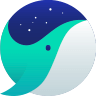
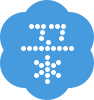

In [101]:
res.content


<!DOCTYPE html>
 <html data-dark="false" lang="ko"> <head> <meta charset="utf-8"/> <title>NAVER</title> <meta content="IE=edge" http-equiv="X-UA-Compatible"/> <meta content="width=1190" name="viewport"/> <meta content="NAVER" name="apple-mobile-web-app-title"> <meta content="index,nofollow" name="robots"> <meta content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요" name="description"> <meta content="네이버" property="og:title"/> <meta content="https://www.naver.com/" property="og:url"/> <meta content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png" property="og:image"/> <meta content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요" property="og:description"> <meta content="summary" name="twitter:card"/> <meta content="" name="twitter:title"/> <meta content="https://www.naver.com/" name="twitter:url"/> <meta content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png" name="twitter:image"/> <meta content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요" name="twitter:de
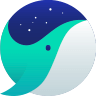
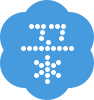

In [102]:
soup = bs(res.content, 'html.parser')
soup

In [106]:
data2 = soup.select('div.group_nav')

In [126]:
data_list=[]
for i in data2:
    data_list.append(i.text)
    print(i.text)




메일

카페
블로그
지식iN
쇼핑
쇼핑LIVE
Pay

TV



사전
뉴스
증권
부동산
지도
VIBE
도서
웹툰


더보기

서비스 전체보기
메뉴설정
초기화
저장




In [112]:
data_list

['\n\n\n메일\n\n카페\n블로그\n지식iN\n쇼핑\n쇼핑LIVE\nPay\n\nTV\n\n\n\n사전\n뉴스\n증권\n부동산\n지도\nVIBE\n도서\n웹툰\n\n\n더보기\n\n서비스 전체보기\n메뉴설정\n초기화\n저장\n\n']

In [118]:
type(data_list)

list

In [120]:
data_list = list(map(lambda s : ''.join(s.split()), data_list))

In [121]:
data_list

['메일카페블로그지식iN쇼핑쇼핑LIVEPayTV사전뉴스증권부동산지도VIBE도서웹툰더보기서비스전체보기메뉴설정초기화저장']